# 1. Import libraries

In [1]:
import copy # deepcopy
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import statistics # mean from statistics

from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score
# from scipy import misc
# from hmmlearn import hmm
from PIL import Image

# 2. Global Variables and Load images

## 2.1. Global Variables

In [2]:
TOTAL_NUMBER_OF_PEOPLE = 45
NUMBER_OF_EACH_IRIS_PER_PERSON = 5
TOTAL_NUMBER_OF_EACH_IRIS = TOTAL_NUMBER_OF_PEOPLE * NUMBER_OF_EACH_IRIS_PER_PERSON

## 2.2. Load images into 2 lists in 2 ways
* RGB vs Grayscale
* Left iris vs Right iris

In [3]:
path = os.getcwd()
rgb_left_iris_l = []
rgb_right_iris_l = []
gray_left_iris_l = []
gray_right_iris_l = []

for dirname, _, filenames in os.walk(path+'/data/MMU-Iris-Database/'):
    for filename in filenames:
        if filename not in ['.DS_Store', 'ReadMe.txt', 'Thumbs.db']:
            dir_file_s = os.path.join(dirname, filename)
#             print(filename)
            dirname_l = dirname.split("/")
            if dirname_l[-1] == 'left':
                rgb_left_iris_l.append(plt.imread(dir_file_s))
                gray_image = Image.open(dir_file_s).convert('L')
                gray_left_iris_l.append(np.array(gray_image))
            elif dirname_l[-1] == 'right':
                rgb_right_iris_l.append(plt.imread(dir_file_s))
                gray_image = Image.open(dir_file_s).convert('L')
                gray_right_iris_l.append(np.array(gray_image))
            else:
                print(f'Neither left or right iris in {dir_file_s}')

## 2.3. Check the size of the lists

In [4]:
print(len(rgb_left_iris_l))
print(len(rgb_right_iris_l))
print(len(gray_left_iris_l))
print(len(gray_right_iris_l))

225
225
225
225


In [5]:
print(type(rgb_left_iris_l[0]), '\n')
print(rgb_left_iris_l[0].shape, '\n')
print(rgb_left_iris_l[0])

<class 'numpy.ndarray'> 

(240, 320, 3) 

[[[200 204 200]
  [184 188 184]
  [184 188 184]
  ...
  [ 64  68  64]
  [ 72  76  72]
  [ 80  76  72]]

 [[192 200 192]
  [184 188 184]
  [192 184 184]
  ...
  [ 80  84  80]
  [ 72  76  72]
  [ 80  80  80]]

 [[192 196 192]
  [184 188 184]
  [176 180 176]
  ...
  [ 40  52  40]
  [ 64  60  64]
  [ 80  76  72]]

 ...

 [[240 240 232]
  [184 192 192]
  [184 188 184]
  ...
  [128 124 120]
  [120 128 128]
  [128 124 120]]

 [[248 248 248]
  [248 248 240]
  [232 240 240]
  ...
  [152 156 152]
  [160 160 160]
  [160 156 152]]

 [[  0   4   0]
  [  8   8   8]
  [  0   4   0]
  ...
  [  0   8   0]
  [  8   4   8]
  [  8   8   8]]]


In [6]:
print(type(gray_left_iris_l[0]), '\n')
print(gray_left_iris_l[0].shape, '\n')
print(gray_left_iris_l[0])

<class 'numpy.ndarray'> 

(240, 320) 

[[202 186 186 ...  66  74  77]
 [197 186 186 ...  82  74  80]
 [194 186 178 ...  47  62  77]
 ...
 [239 190 186 ... 125 126 125]
 [248 247 238 ... 154 160 157]
 [  2   8   2 ...   5   6   8]]


# 3. Slicing

## 3.1. slice_data()

In [7]:
def slice_data(data, number_of_slices):
    x_slice_interval_i = len(data) // number_of_slices
    sliced_data_l = []
    for i in range(number_of_slices):
        sliced_data_l.append(data[x_slice_interval_i * i : x_slice_interval_i * (i+1)])
    return sliced_data_l

## 3.2. print_slice_data()

In [8]:
def print_slice_data(data):
    print(f"{len(data)} irises")
    print(f"{len(data[0])} slices")
    print(f"{len(data[0][0])} height pixels in grayscale")
    print(f"{len(data[0][0][0])} width pixels in grayscale")

## 3.3. Slice left iris

In [9]:
number_of_slices = 5
left_iris_sliced_into_5_l = []
for iris in gray_left_iris_l:
    left_iris_sliced_into_5_l.append(slice_data(iris, number_of_slices))
print_slice_data(left_iris_sliced_into_5_l)

225 irises
5 slices
48 height pixels in grayscale
320 width pixels in grayscale


In [10]:
number_of_slices = 10
left_iris_sliced_into_10_l = []
for iris in gray_left_iris_l:
    left_iris_sliced_into_10_l.append(slice_data(iris, number_of_slices))
print_slice_data(left_iris_sliced_into_10_l)

225 irises
10 slices
24 height pixels in grayscale
320 width pixels in grayscale


In [11]:
number_of_slices = 24
left_iris_sliced_into_24_l = []
for iris in gray_left_iris_l:
    left_iris_sliced_into_24_l.append(slice_data(iris, number_of_slices))
print_slice_data(left_iris_sliced_into_24_l)

225 irises
24 slices
10 height pixels in grayscale
320 width pixels in grayscale


## 3.4. Slice right iris

In [12]:
number_of_slices = 5
right_iris_sliced_into_5_l = []
for iris in gray_right_iris_l:
    right_iris_sliced_into_5_l.append(slice_data(iris, number_of_slices))
print_slice_data(right_iris_sliced_into_5_l)

225 irises
5 slices
48 height pixels in grayscale
320 width pixels in grayscale


In [13]:
number_of_slices = 10
right_iris_sliced_into_10_l = []
for iris in gray_right_iris_l:
    right_iris_sliced_into_10_l.append(slice_data(iris, number_of_slices))
print_slice_data(right_iris_sliced_into_10_l)

225 irises
10 slices
24 height pixels in grayscale
320 width pixels in grayscale


In [14]:
number_of_slices = 24
right_iris_sliced_into_24_l = []
for iris in gray_right_iris_l:
    right_iris_sliced_into_24_l.append(slice_data(iris, number_of_slices))
print_slice_data(right_iris_sliced_into_24_l)

225 irises
24 slices
10 height pixels in grayscale
320 width pixels in grayscale


## 3.5. Convever to DataFrame

In [15]:
left_iris_sliced_into_5_df = pd.DataFrame(left_iris_sliced_into_5_l)
left_iris_sliced_into_10_df = pd.DataFrame(left_iris_sliced_into_10_l)
left_iris_sliced_into_24_df = pd.DataFrame(left_iris_sliced_into_24_l)
right_iris_sliced_into_5_df = pd.DataFrame(right_iris_sliced_into_5_l)
right_iris_sliced_into_10_df = pd.DataFrame(right_iris_sliced_into_10_l)
right_iris_sliced_into_24_df = pd.DataFrame(right_iris_sliced_into_24_l)

Now we have 3 each sliced datasets for both left and right iris;
* left_iris_sliced_into_5_df: 225 x 5 x 48 x 320
* left_iris_sliced_into_10_df: 225 x 10 x 24 x 320
* left_iris_sliced_into_24_df: 225 x 24 x 10 x 320
* right_iris_sliced_into_5_df: 225 x 5 x 48 x 320
* right_iris_sliced_into_10_df: 225 x 10 x 24 x 320
* right_iris_sliced_into_24_df: 225 x 100 x 10 x 320

The way to interpret the dimension is;
* ex) left_iris_sliced_into_5_df has 225 left irises of 5 slices of an 48 x 320 grayscale image.

In [16]:
left_iris_sliced_into_5_df.shape

(225, 5)

In [17]:
left_iris_sliced_into_5_df.head(10)

,0,1,2,3,4
0,"[[202, 186, 186, 184, 173, 168, 183, 184, 191,...","[[226, 221, 221, 218, 224, 221, 218, 221, 222,...","[[234, 234, 218, 231, 229, 242, 238, 241, 224,...","[[237, 226, 232, 231, 248, 234, 239, 248, 213,...","[[138, 138, 143, 144, 141, 144, 151, 147, 151,..."
1,"[[210, 202, 205, 213, 224, 226, 231, 214, 199,...","[[237, 232, 234, 231, 234, 232, 234, 234, 234,...","[[248, 248, 248, 248, 231, 234, 238, 234, 234,...","[[223, 232, 221, 226, 226, 234, 232, 202, 202,...","[[183, 178, 178, 176, 174, 181, 178, 181, 186,..."
2,"[[221, 221, 210, 214, 205, 173, 174, 183, 192,...","[[237, 229, 230, 229, 234, 226, 226, 237, 240,...","[[237, 232, 241, 248, 227, 231, 224, 226, 226,...","[[178, 175, 163, 162, 162, 162, 159, 160, 159,...","[[181, 184, 178, 183, 184, 182, 183, 178, 186,..."
3,"[[167, 154, 168, 182, 197, 199, 206, 202, 210,...","[[248, 237, 242, 240, 241, 234, 229, 227, 239,...","[[248, 248, 248, 234, 226, 210, 215, 214, 213,...","[[170, 167, 162, 160, 162, 163, 159, 162, 162,...","[[173, 168, 167, 166, 168, 167, 170, 162, 162,..."
4,"[[221, 200, 207, 202, 202, 205, 202, 202, 206,...","[[247, 232, 234, 234, 237, 240, 241, 235, 241,...","[[221, 213, 202, 198, 197, 194, 194, 194, 197,...","[[162, 159, 158, 159, 154, 160, 154, 130, 122,...","[[186, 178, 181, 181, 174, 173, 168, 165, 162,..."
5,"[[178, 143, 142, 157, 162, 168, 165, 162, 167,...","[[205, 200, 194, 197, 197, 200, 200, 202, 197,...","[[210, 207, 210, 210, 214, 213, 213, 218, 218,...","[[226, 223, 214, 215, 216, 218, 215, 214, 218,...","[[248, 231, 234, 234, 234, 230, 229, 226, 229,..."
6,"[[146, 143, 128, 122, 136, 141, 144, 138, 141,...","[[173, 160, 157, 154, 160, 159, 160, 159, 158,...","[[173, 165, 166, 168, 169, 168, 170, 170, 176,...","[[178, 175, 170, 176, 178, 178, 178, 178, 176,...","[[234, 229, 216, 223, 224, 221, 226, 224, 213,..."
7,"[[234, 223, 234, 214, 210, 202, 205, 202, 202,...","[[248, 234, 229, 232, 234, 237, 237, 234, 224,...","[[248, 226, 231, 230, 231, 230, 231, 226, 234,...","[[247, 232, 234, 234, 234, 234, 234, 237, 237,...","[[234, 218, 215, 218, 218, 216, 218, 218, 210,..."
8,"[[202, 194, 197, 202, 194, 199, 203, 201, 200,...","[[226, 213, 208, 207, 210, 213, 210, 210, 214,...","[[218, 210, 210, 215, 210, 216, 210, 218, 210,...","[[234, 226, 223, 224, 221, 226, 229, 234, 234,...","[[234, 226, 231, 226, 218, 224, 237, 240, 234,..."
9,"[[189, 178, 181, 178, 176, 173, 176, 170, 175,...","[[218, 202, 202, 207, 224, 218, 207, 210, 208,...","[[229, 216, 213, 216, 215, 216, 213, 216, 213,...","[[248, 226, 223, 230, 223, 226, 232, 234, 231,...","[[218, 213, 213, 214, 215, 216, 218, 218, 218,..."


In [18]:
print(len(left_iris_sliced_into_5_df[0].shape))
print(left_iris_sliced_into_5_df[0][0].shape)
print(type(left_iris_sliced_into_5_df[0][0]))
print(pd.DataFrame(left_iris_sliced_into_5_df[0][0]).head())

1
(48, 320)
<class 'numpy.ndarray'>
   0    1    2    3    4    5    6    7    8    9    ...  310  311  312  313  \
0  202  186  186  184  173  168  183  184  191  189  ...   40   42   47   64   
1  197  186  186  176  173  173  182  193  198  197  ...   80   82   85   93   
2  194  186  178  178  175  176  189  197  200  202  ...   80   77   64   61   
3  202  183  178  170  176  186  194  210  207  200  ...   56   64   71   75   
4  186  183  176  178  194  198  207  216  218  194  ...  103   98   98   98   

   314  315  316  317  318  319  
0   66   70   66   66   74   77  
1   83   98   77   82   74   80  
2   56   53   54   47   62   77  
3   79   82   83   85   85   96  
4   88   88   82   88   74   98  

[5 rows x 320 columns]


# 4. Add Label

In [19]:
left_target_df = pd.DataFrame(0, index=[i for i in range(TOTAL_NUMBER_OF_EACH_IRIS)], columns=["target"])
right_target_df = pd.DataFrame(1, index=[i for i in range(TOTAL_NUMBER_OF_EACH_IRIS)], columns=["target"])

# 5. Modeling: Naive Bayes

## 5.1. Helper Functions

### 5.1. create_y()

In [20]:
def create_y(data, left_or_right_s):
    length = len(data)
    left_right_d = {"left": 0, "right": 1}
    left_right_i = left_right_d[left_or_right_s.lower()]
    return pd.DataFrame(left_right_i, index=[i for i in range(length)], columns=["target"])

### 5.2. cbind()

In [21]:
def cbind(left_data, right_data):
    return pd.concat([pd.DataFrame(left_data), pd.DataFrame(right_data)])

### 5.3. rbind_and_shuffle()

In [22]:
def rbind_and_shuffle(x, y):
    if pd.DataFrame(x).shape[0] != pd.DataFrame(y).shape[0]:
        raise Exception("The number of rows between x and y should be the same.")
    rbind_df = pd.concat([x, y], axis=1)
    rbind_df.sample(frac=1).reset_index(drop=True)
    return rbind_df.iloc[:, :-1], rbind_df.iloc[:, -1]

### 5.4. get_metrics()

In [23]:
def get_metrics(x, y, clf, metric_d):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
    clf.fit(x_train, y_train)
    y_pred = clf.fit(x_train, y_train).predict(x_test)
    
    acc = accuracy_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    metric_d["acc"].append(acc)
    metric_d["pre"].append(pre)
    metric_d["rec"].append(rec)
    metric_d["f1"].append(f1)
    metric_d["roc_auc"].append(roc_auc)
    
    return metric_d

### 5.5. loop_through_data()

In [24]:
def loop_through_data(left_data, right_data, clf, metric_d, agg_metric_d):
    if left_data.shape != right_data.shape:
        raise Exception("The shape of left_data and right_data should be the same.")

    n_iris_i, n_slice_i = left_data.shape
    for iris_index in range(n_iris_i):
        for slice_index in range(n_slice_i):
            left_iris_slice_nda = left_data.iloc[iris_index, slice_index]
            right_iris_slice_nda = right_data.iloc[iris_index, slice_index]
            x = cbind(left_iris_slice_nda, right_iris_slice_nda)
            
            left_y = create_y(left_iris_slice_nda, "left")
            right_y = create_y(right_iris_slice_nda, "right")
            y = cbind(left_y, right_y)
            y = y.squeeze()
            
            x, y = rbind_and_shuffle(x, y)
            
            metric_d = get_metrics(x, y, clf, metric_d)

        for metric in agg_metric_d.keys():
            agg_metric_d[metric] = statistics.mean(metric_d[metric])
            metric_d[metric].clear()

    return agg_metric_d

## 5.2. Run

In [25]:
iris_metric_d = defaultdict(dict)

### 5.2.1. sliced_into_5

In [26]:
metric_d = {"acc": []
           , "pre": []
           , "rec": []
           , "f1": []
           , "roc_auc": []}
agg_metric_d = copy.deepcopy(metric_d)

In [27]:
agg_metric_d = loop_through_data(left_iris_sliced_into_5_df, right_iris_sliced_into_5_df, GaussianNB(), metric_d, agg_metric_d)

In [28]:
iris_metric_d[5] = agg_metric_d
agg_metric_d

{'acc': 0.993103448275862,
 'pre': 1.0,
 'rec': 0.9866666666666667,
 'f1': 0.993103448275862,
 'roc_auc': 0.9933333333333333}

### 5.2.2. sliced_into_10

In [29]:
metric_d = {"acc": []
           , "pre": []
           , "rec": []
           , "f1": []
           , "roc_auc": []}
agg_metric_d = copy.deepcopy(metric_d)

In [30]:
agg_metric_d = loop_through_data(left_iris_sliced_into_10_df, right_iris_sliced_into_10_df, GaussianNB(), metric_d, agg_metric_d)

In [31]:
iris_metric_d[10] = agg_metric_d
agg_metric_d

{'acc': 0.9933333333333333,
 'pre': 1.0,
 'rec': 0.990909090909091,
 'f1': 0.9952380952380953,
 'roc_auc': 0.9954545454545455}

### 5.2.3. sliced_into_24

In [32]:
metric_d = {"acc": []
           , "pre": []
           , "rec": []
           , "f1": []
           , "roc_auc": []}
agg_metric_d = copy.deepcopy(metric_d)

In [33]:
agg_metric_d = loop_through_data(left_iris_sliced_into_24_df, right_iris_sliced_into_24_df, GaussianNB(), metric_d, agg_metric_d)

/Users/immanuel/Library/Python/3.8/lib/python/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/immanuel/Library/Python/3.8/lib/python/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/immanuel/Library/Python/3.8/lib/python/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/immanuel/Library/Python/3.8/lib/python/site-packages/sklearn

In [34]:
iris_metric_d[24] = agg_metric_d
agg_metric_d

{'acc': 0.8680555555555556,
 'pre': 0.95,
 'rec': 0.8125,
 'f1': 0.8469576719576719,
 'roc_auc': 0.8958333333333334}

# 6. Data Visualization

## 6.1. Convert Dict to DataFrame

In [35]:
iris_metric_d

defaultdict(dict,
            {5: {'acc': 0.993103448275862,
              'pre': 1.0,
              'rec': 0.9866666666666667,
              'f1': 0.993103448275862,
              'roc_auc': 0.9933333333333333},
             10: {'acc': 0.9933333333333333,
              'pre': 1.0,
              'rec': 0.990909090909091,
              'f1': 0.9952380952380953,
              'roc_auc': 0.9954545454545455},
             24: {'acc': 0.8680555555555556,
              'pre': 0.95,
              'rec': 0.8125,
              'f1': 0.8469576719576719,
              'roc_auc': 0.8958333333333334}})

In [36]:
iris_metric_df = pd.DataFrame.from_dict(iris_metric_d)

In [37]:
iris_metric_df

,5,10,24
acc,0.993103,0.993333,0.868056
pre,1.000000,1.000000,0.950000
rec,0.986667,0.990909,0.812500
f1,0.993103,0.995238,0.846958
roc_auc,0.993333,0.995455,0.895833


In [38]:
iris_metric_df.columns = [str(i) for i in iris_metric_df.columns]

## 6.2. Transpose

In [39]:
iris_metric_df = iris_metric_df.transpose()
iris_metric_df

,acc,pre,rec,f1,roc_auc
5,0.993103,1.00,0.986667,0.993103,0.993333
10,0.993333,1.00,0.990909,0.995238,0.995455
24,0.868056,0.95,0.812500,0.846958,0.895833


## 6.3. Data Visualization

In [40]:
iris_metric_df.index

Index(['5', '10', '24'], dtype='object')

In [41]:
iris_metric_df.columns

Index(['acc', 'pre', 'rec', 'f1', 'roc_auc'], dtype='object')

Text(0, 0.5, 'Metrics from 0 to 1')

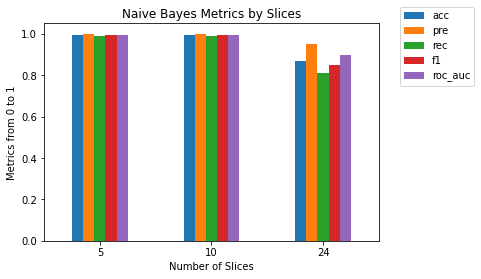

In [42]:
iris_metric_df.plot(y=iris_metric_df.columns, use_index=True, kind="bar")
plt.legend(bbox_to_anchor=(1.3, 1.1))
plt.title("Naive Bayes Metrics by Slices")
plt.xticks(rotation=0)
plt.xlabel("Number of Slices")
plt.ylabel("Metrics from 0 to 1")